# Harvard Medical School - Data Analysis Center Somatic SNV TruthSet

from https://data.smaht.org/variant-calls/d1b6eb8a-8941-4c39-a992-f56ee656a4c2/

In [1]:
import io
import os
import pandas as pd
import numpy as np
import gzip as gz
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib_venn import venn2, venn3

sns.set_theme(font="Arial", font_scale=1.15, style='ticks') 
matplotlib.rcParams['figure.dpi'] = 300
plt.rc("axes.spines", top=True, right=True)

def read_vcf(path):
    if path[-3:] == ".gz": 
        with gz.open(path, 'rb') as f:
            lines = [l.decode('utf-8') for l in f if not l.startswith(b'##')]
            return pd.read_csv(
                io.StringIO(''.join(lines)),
                dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
                       'QUAL': str, 'FILTER': str, 'INFO': str},
                       sep='\t'
                       ).rename(columns={'#CHROM': 'CHROM'})
    else:
        with open(path, 'r') as f:
            lines = [l for l in f if not l.startswith('##')]
            return pd.read_csv(
                io.StringIO(''.join(lines)),
                dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
                       'QUAL': str, 'FILTER': str, 'INFO': str},
                       sep='\t'
                       ).rename(columns={'#CHROM': 'CHROM'})

def vcf_info_parser(info_string) -> dict:
    """
    Parameters
    ----------
    info_string : str
    SP=STK,RF,MT2,VN;RGN=Difficult;RGN_T=Tier2;VAF_Ill=0.965;VAF_PB=1

    return dict

    """
    return {i.split('=')[0]: i.split('=')[1] for i in info_string.split(';')}

def vcf_info_getter(df, field):
    """
    Parameters
    ----------
    
    df : pandas.core.frame.DataFrame
        vcf read through read_vcf()
    field : str
        VAF_Ill, VAF_PB
    
    return pd.Series

    Example vcf structure
    ----------
    INFO
    SP=STK,RF,MT2,VN;RGN=Difficult;RGN_T=Tier2;VAF_Ill=0.965;VAF_PB=1
    SP=STK,RF,MT2,VN;RGN=Easy;RGN_T=Tier0;VAF_Ill=0.981;VAF_PB=0.984
    """

    if field == "RGN":
        return df['INFO'].apply(lambda x: vcf_info_parser(x)[field])
    
    elif field == "RGN_T":
        return df['INFO'].apply(lambda x: vcf_info_parser(x)[field])
    
    elif field == "VAF_Ill" or field == "VAF_PB":
        return df['INFO'].apply(lambda x: float(vcf_info_parser(x)[field]) if vcf_info_parser(x)[field] != 'NA' else np.nan)

    else:
        raise ValueError("field should be one of RGN, RGN_T, VAF_Ill and VAF_PB!")

dir="/mmfs1/gscratch/stergachislab/mhsohny/SMaHT/Improving_SomaticVariantCalling_through_DSA/HMS-DAC_SNV_TruthSet"
DSA="/mmfs1/gscratch/stergachislab/mhsohny/SMaHT/DSA/DSA_COLO829BL_v3.0.0.fasta"

In [2]:
'''
os.system("zcat /mmfs1/gscratch/stergachislab/mhsohny/SMaHT/Improving_SomaticVariantCalling_through_DSA/HMS-DAC_SNV_TruthSet/SMAVCPP8F92V.vcf.gz | awk '/^##/' - > pseudovcf_header)
'''

'\nos.system("zcat /mmfs1/gscratch/stergachislab/mhsohny/SMaHT/Improving_SomaticVariantCalling_through_DSA/HMS-DAC_SNV_TruthSet/SMAVCPP8F92V.vcf.gz | awk \'/^##/\' - > pseudovcf_header)\n'

In [3]:
colotb_hms_vcf = read_vcf(f"{dir}/SMAVCPP8F92V.vcf.gz")
colotb_hms_vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,COL829T
0,chr1,761264,.,G,A,.,.,"SP=STK,RF;RGN=Difficult;RGN_T=Tier2;VAF_Ill=0....",.,.
1,chr1,887559,.,C,T,.,.,"SP=STK,RF,MT2,VN;RGN=Difficult;RGN_T=Tier2;VAF...",.,.
2,chr1,948136,.,G,A,.,.,"SP=STK,RF,MT2,VN;RGN=Difficult;RGN_T=Tier1;VAF...",.,.
3,chr1,1182262,.,C,T,.,.,"SP=STK,RF,MT2,VN;RGN=Difficult;RGN_T=Tier1;VAF...",.,.
4,chr1,1321993,.,G,A,.,.,"SP=STK,RF,MT2,VN;RGN=Easy;RGN_T=Tier0;VAF_Ill=...",.,.
...,...,...,...,...,...,...,...,...,...,...
36644,chrY,11485034,.,C,G,.,.,SP=STK;RGN=Difficult;RGN_T=Tier1;VAF_Ill=1;VAF...,.,.
36645,chrY,11485062,.,T,A,.,.,SP=STK;RGN=Difficult;RGN_T=Tier1;VAF_Ill=1;VAF...,.,.
36646,chrY,11485074,.,G,C,.,.,SP=STK;RGN=Difficult;RGN_T=Tier1;VAF_Ill=1;VAF...,.,.
36647,chrY,11485238,.,G,A,.,.,SP=STK;RGN=Difficult;RGN_T=Tier1;VAF_Ill=1;VAF...,.,.


Text(0.5, 0, 'VAF')

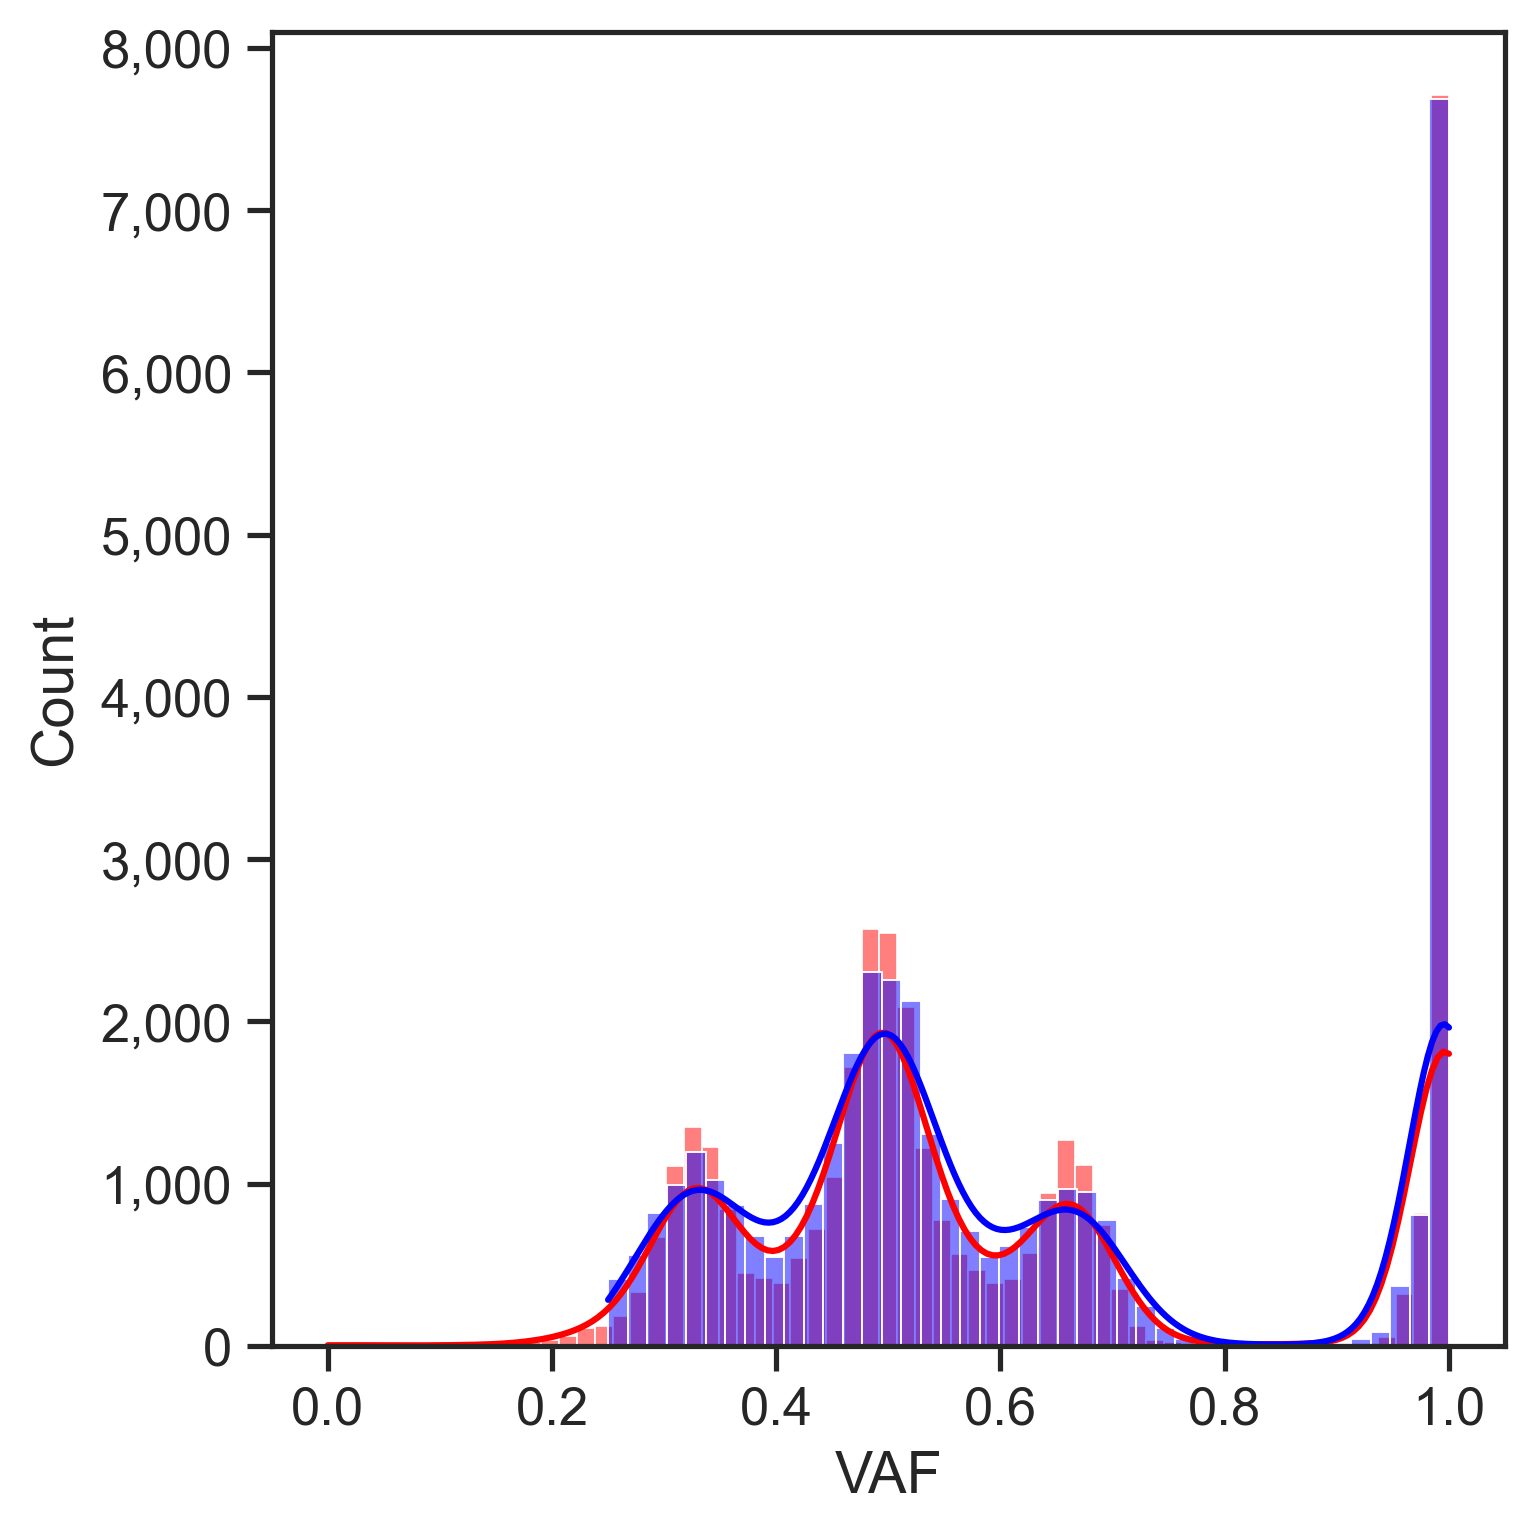

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5,5), constrained_layout=True)
sns.histplot(vcf_info_getter(colotb_hms_vcf, "VAF_Ill"), color='red', kde=True, ax=ax)
sns.histplot(vcf_info_getter(colotb_hms_vcf, "VAF_PB"), color='blue', kde=True, ax=ax)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel("VAF")

Text(0.5, 0, 'VAF')

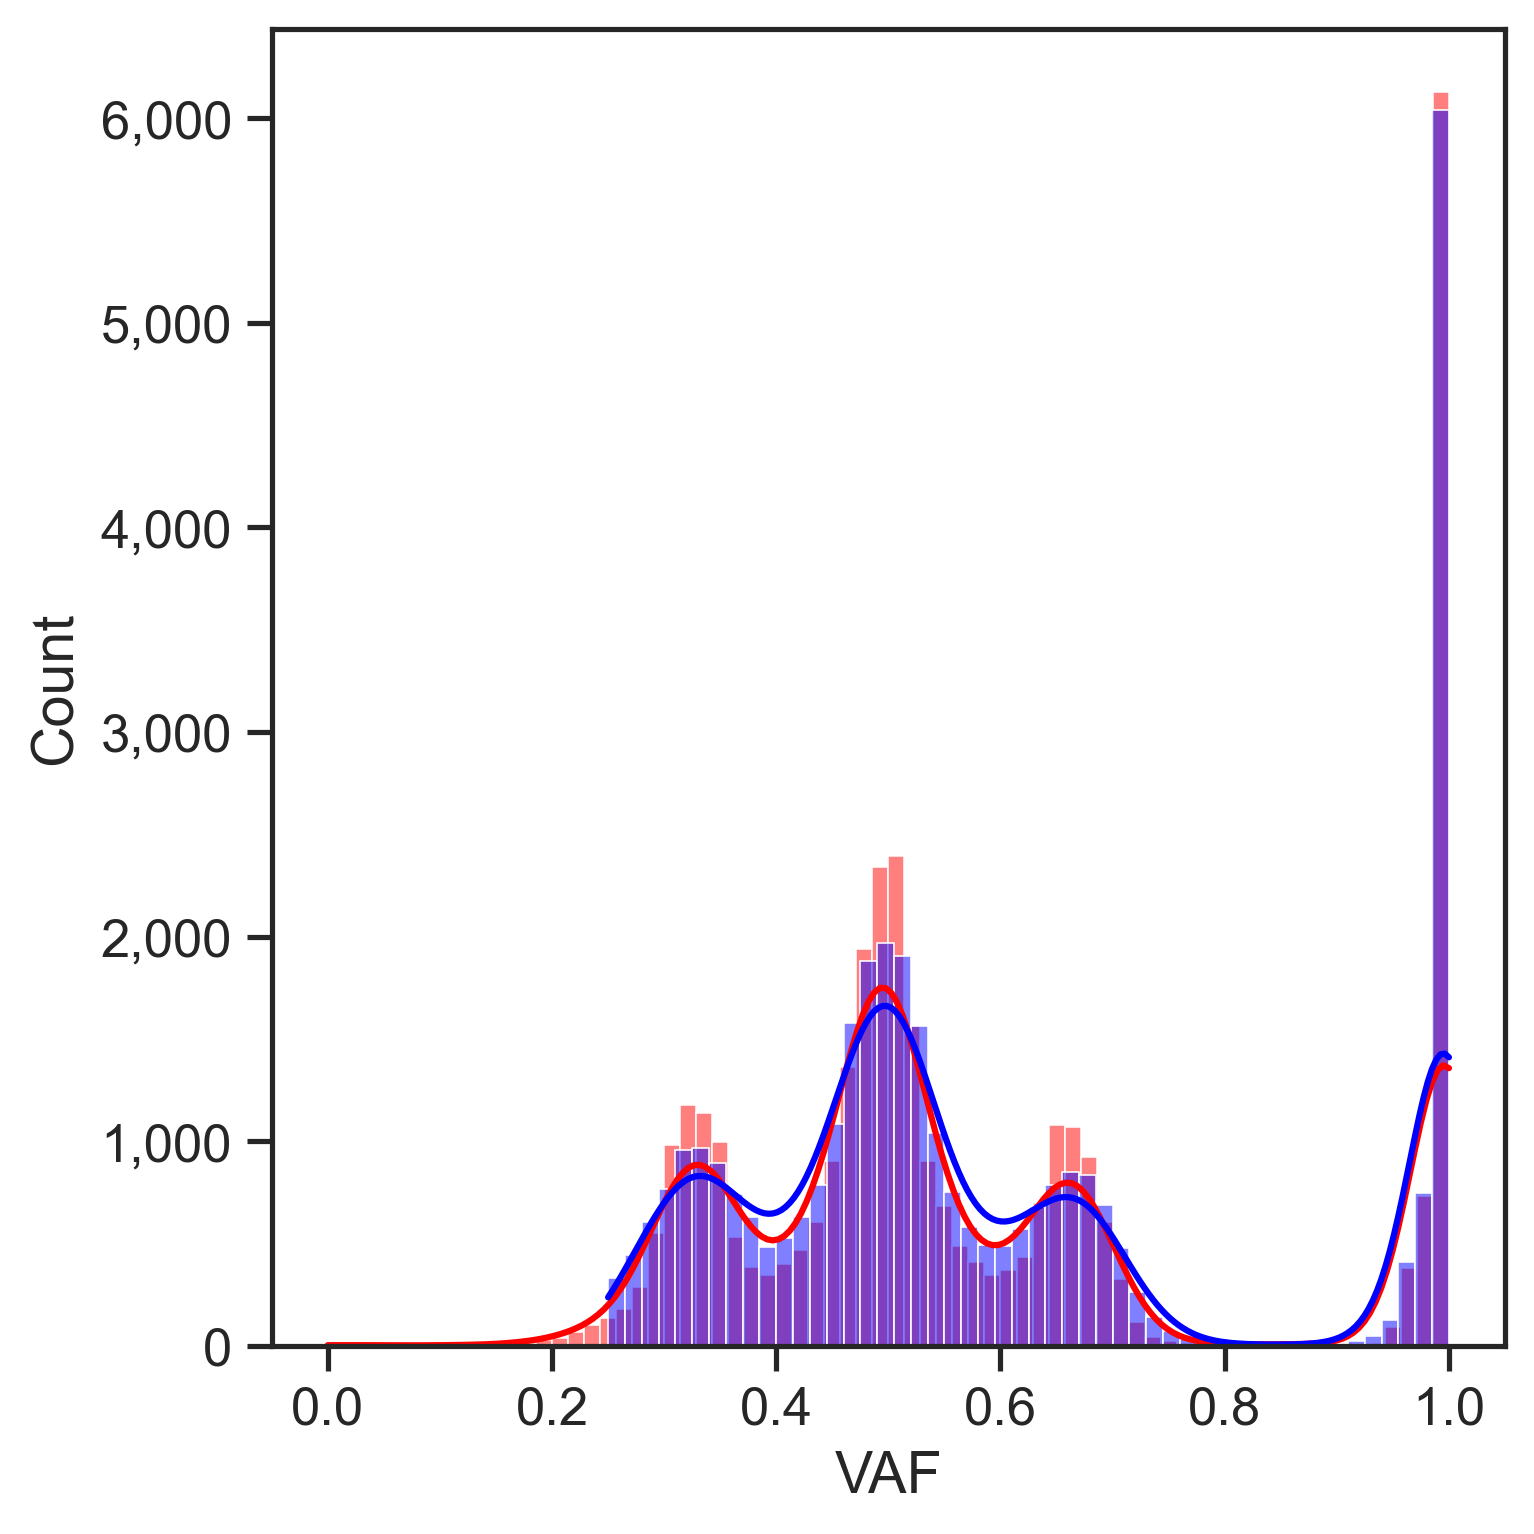

In [9]:
# After removing chrX and chrY
fig, ax = plt.subplots(1,1, figsize=(5,5), constrained_layout=True)
sns.histplot(vcf_info_getter(colotb_hms_vcf[~colotb_hms_vcf['CHROM'].isin(['chrX', 'chrY'])], "VAF_Ill"), color='red', kde=True, ax=ax)
sns.histplot(vcf_info_getter(colotb_hms_vcf[~colotb_hms_vcf['CHROM'].isin(['chrX', 'chrY'])], "VAF_PB"), color='blue', kde=True, ax=ax)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel("VAF")

In [13]:
colotb_hms_vcf.shape[0] - colotb_hms_vcf[~colotb_hms_vcf['CHROM'].isin(['chrX', 'chrY'])].shape[0]

1694

<Axes: xlabel='INFO', ylabel='Count'>

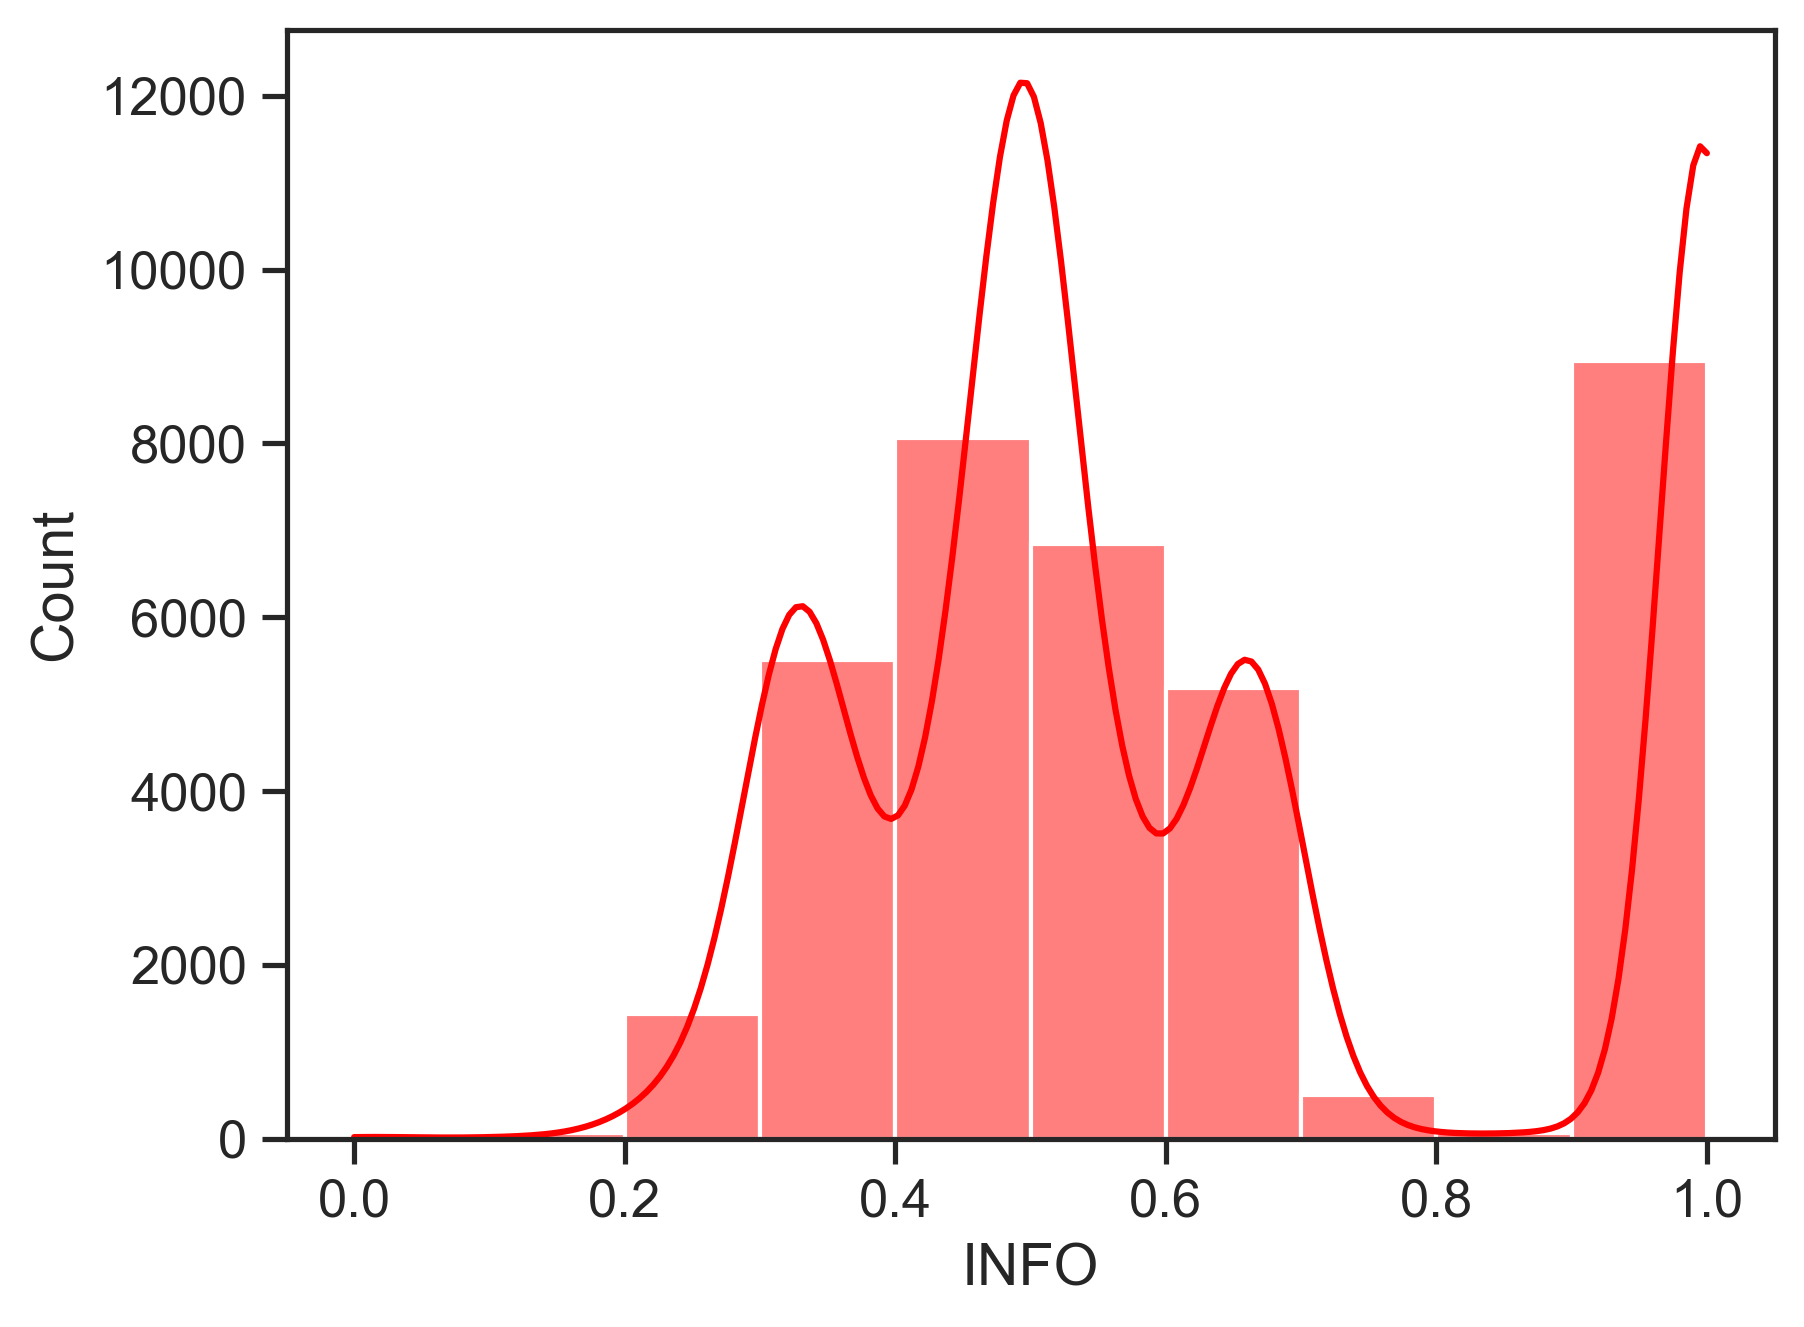

In [20]:
sns.histplot(vcf_info_getter(colotb_hms_vcf, "VAF_Ill"), color='red', bins=10, kde=True)